# 优化算法概述


你也许会对我们用很大篇幅来介绍优化算法感到奇怪。如果你一直按照本教程的顺序读到这里，你很可能已经用了优化算法来训练模型并学出模型的参数，例如在训练模型时不断迭代参数以最小化损失函数。

优化算法对于深度学习十分重要。首先，实际中训练一个复杂的深度学习模型可能需要数小时、数日、甚至数周时间。而优化算法的效率直接影响模型训练效率。其次，深刻理解各种优化算法的原理以及其中各参数的意义将可以有助于我们更有针对性地调参，从而使深度学习模型表现地更好。


本章将详细介绍深度学习中的一些常用优化算法。

![](../img/training_model.png)

## 优化与机器学习

在一个机器学习的问题中，我们会预先定义一个损失函数，然后用优化算法来最小化这个损失函数。在优化中，这样的损失函数通常被称作优化问题的**目标函数**。依据惯例，优化算法通常只考虑最小化目标函数。任何最大化问题都可以很容易地转化为最小化问题：我们只需把目标函数前面的符号翻转一下。

在机器学习中，优化算法的目标函数通常是一个基于训练数据集的损失函数。因此，优化往往对应降低训练误差。而机器学习的主要目标在于降低泛化误差，例如应用一些应对过拟合的技巧。在本章针对优化算法的实验中，我们只关注优化算法在最小化目标函数上的表现。


## 优化问题的挑战

绝大多数深度学习中的目标函数都很复杂。因此，很多优化问题并不存在显示解（解析解），而需要使用基于数值方法的优化算法找到近似解。这类优化算法一般通过不断迭代更新解的数值来找到近似解。我们讨论的优化都是这类基于数值方法的算法。

以下我们列举优化问题中的两个挑战：局部最小值和鞍点。


### 局部最小值

对于目标函数$f(x)$，如果$f(x)$在$x$上的值比在$x$邻近的其他点的值更小，那么$f(x)$可能是一个局部最小值。如果$f(x)$在$x$上的值是其在整个定义域上的最小值，那么$f(x)$是全局最小值。

下图中展示了函数

$$f(x) = x \cdot \text{cos}(\pi x), \qquad -1.0 \leq x \leq 2.0.$$

的局部最小值和全局最小值。

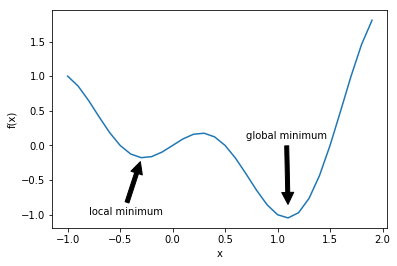

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.cos(np.pi * x)

x = np.arange(-1.0, 2.0, 0.1)
fig = plt.figure()
subplt = fig.add_subplot(111)
subplt.annotate('local minimum', xy=(-0.3, -0.2), xytext=(-0.8, -1.0),
            arrowprops=dict(facecolor='black', shrink=0.05))
subplt.annotate('global minimum', xy=(1.1, -0.9), xytext=(0.7, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

绝大多数深度学习的目标函数有若干局部最优值。当一个优化问题的数值解在局部最优解附近时，由于梯度接近或变成零，最终得到的数值解可能只令目标函数局部最小化而非全局最小化。


### 鞍点

刚刚我们提到梯度接近或变成零可能是由于当前解在局部最优解附近所造成的。事实上，另一种可能性是当前解在鞍点附近。下图展示了定义在一维空间的函数$f(x) = x^3$的鞍点。

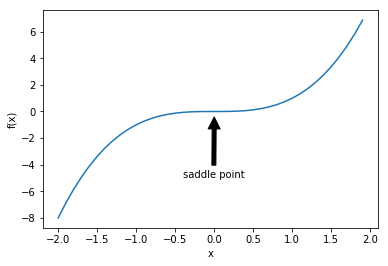

In [2]:
x = np.arange(-2.0, 2.0, 0.1)
fig = plt.figure()
subplt = fig.add_subplot(111)
subplt.annotate('saddle point', xy=(0, -0.2), xytext=(-0.4, -5.0), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x, x**3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

下图展示了定义在二维空间的函数$f(x, y) = x^2 - y^2$的鞍点。该函数看起来像一个马鞍，鞍点恰好是可以坐的区域的中心。

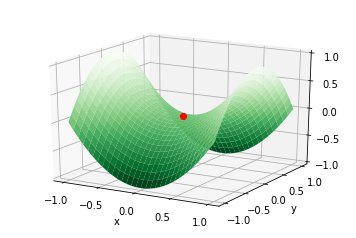

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2
ax.plot_surface(x, y, z, **{'rstride': 1, 'cstride': 1, 'cmap': "Greens_r"})
ax.plot([0], [0], [0], 'ro')
ax.view_init(azim=-60, elev=20)
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

事实上，由于大多数深度学习模型参数都是高维的，目标函数的鞍点往往比局部最小值更常见。


## 结论

深度学习中，虽然找到目标函数的全局最优解很难，但这并非必要。我们将在接下来的章节中逐一介绍深度学习中常用的优化算法，它们在很多实际问题中都训练出了十分有效的深度学习模型。


## 练习

* 你还能想到哪些深度学习中的优化问题的挑战？


**吐槽和讨论欢迎点**[这里](https://discuss.gluon.ai/t/topic/1876)